In [2]:
%matplotlib inline
import pandas as pd, numpy as np, matplotlib.pyplot as plt
data = pd.read_csv('data/summer-travel-gps-full.csv')
data.head()

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom
1,51.474005,-0.450999,05/14/2014 09:22,Hounslow,United Kingdom
2,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
3,51.478199,-0.446081,05/14/2014 11:24,Hounslow,United Kingdom
4,51.474146,-0.451562,05/14/2014 11:38,Hounslow,United Kingdom


In [4]:
# Q1: how to get 2 columns from the dataframe (city and country)?
data[["city","country"]]

,city,country
0,West Drayton,United Kingdom
1,Hounslow,United Kingdom
2,Hounslow,United Kingdom
3,Hounslow,United Kingdom
4,Hounslow,United Kingdom
...,...,...
1754,Munich,Germany
1755,Munich,Germany
1756,Munich,Germany
1757,Munich,Germany


In [5]:
# Q2: how to get the first 5 rows of the "city" column?
data_frame=data[["city"]]
data_frame.head(5)

,city
0,West Drayton
1,Hounslow
2,Hounslow
3,Hounslow
4,Hounslow


In [6]:
# Q3: how to use .loc to select the third row of the dataframe?
data.loc[2]

lat               51.478199
lon               -0.446081
date       05/14/2014 10:51
city               Hounslow
country      United Kingdom
Name: 2, dtype: object

In [7]:
# Q4: how to use .loc to select the first row in "country" column?
data.loc[0,'country']

'United Kingdom'

In [8]:
# Q5: how to select the first 4 rows of ['city', 'date'] columns?
data.loc[:3,['city','date']]

,city,date
0,West Drayton,05/14/2014 09:07
1,Hounslow,05/14/2014 09:22
2,Hounslow,05/14/2014 10:51
3,Hounslow,05/14/2014 11:24


In [9]:
# use .iloc for integer position based indexing
# Q6: how to get the value from the row in position 3 and the column in position 2
data.iloc[2,1]

-0.446081

In [10]:
# Q7: how to use iloc to select every 300th row from a data set
data.iloc[::300]

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom
300,41.377091,2.151175,05/20/2014 03:18,Barcelona,Spain
600,50.052338,19.946220,05/31/2014 21:10,Krakow,Poland
900,48.561181,9.059672,06/09/2014 15:12,Tübingen,Germany
1200,41.378301,2.187443,06/17/2014 16:37,Barcelona,Spain
1500,42.208201,20.735993,06/30/2014 08:27,Prizren,Kosovo


In [11]:
# load a reduced set of gps data
df = pd.read_csv('data/summer-travel-gps-simplified.csv')
df.tail()

,lat,lon,date,city,country
173,41.044556,28.983286,07/08/2014 16:44,Istanbul,Turkey
174,41.008992,28.968268,07/08/2014 20:03,Istanbul,Turkey
175,41.043487,28.985488,07/08/2014 22:18,Istanbul,Turkey
176,40.977637,28.823879,07/09/2014 09:03,Istanbul,Turkey
177,48.357110,11.791346,07/09/2014 13:20,Munich,Germany


In [12]:
# Q9: create a Series of true/false, indicating if each "city" row in the column is equal to "Munich"
new_df1 = df['city'] == 'Munich'
new_df1

0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177     True
Name: city, Length: 178, dtype: bool

In [13]:
# Q10: what cities were visited in spain that were not barcelona? Create a dataframe for it. 
new_df2 = df[(df['country']=='Spain')&(df['city']!='Barcelona')] 
new_df2

,lat,lon,date,city,country
24,41.303911,2.105931,05/18/2014 22:35,El Prat de Llobregat,Spain
25,41.289946,2.064590,05/18/2014 23:04,Viladecans,Spain
126,41.306752,2.097624,06/12/2014 17:19,El Prat de Llobregat,Spain
127,41.304333,2.072728,06/12/2014 17:49,El Prat de Llobregat,Spain
131,41.358460,2.128701,06/13/2014 11:35,Hospitalet de Llobregat,Spain
138,41.294761,2.059722,06/20/2014 22:15,Viladecans,Spain


In [14]:
# Q11: select rows where either the city is munich, or the country is serbia
new_df3 = df[(df['country']=='Serbia')&(df['city']=='munich')] 
new_df3

,lat,lon,date,city,country


In [15]:
# Q12: how many observations are west of the prime meridian?
new_df4 = df[df['lon'] < 0]
num_new_df4 = len(new_df4)
print("Number of observations west of the prime meridian:", num_new_df4)


Number of observations west of the prime meridian: 24


In [16]:
# Q13: get all rows that contain a city that starts with the letter G
new_df5 = df[df['city'].str.startswith('G')]
new_df5

,lat,lon,date,city,country
62,50.273632,18.729429,06/02/2014 06:39,Gliwice,Poland
114,48.282940,8.199630,06/10/2014 13:33,Gutach,Germany
115,48.389029,8.021342,06/10/2014 13:48,Gengenbach,Germany
152,40.187825,20.079303,07/04/2014 17:42,Gjirokastër,Albania


In [24]:
# Q14: how many unique cities and countries in the dataset? 
# Also can you check missing values for the dataframe
new_df6 = df['city'].nunique()
new_df7 = df['country'].nunique()
missing_values = df.isnull().sum()
print("Number of unique cities:",new_df6)
print("Number of unique countries:",new_df7)
print(missing_values)

Number of unique cities: 91
Number of unique countries: 15
lat        0
lon        0
date       0
city       0
country    0
dtype: int64


In [45]:
# Q15: group by country name and show the city names in each of the country
new_df8=df.groupby('country')
for country,c in new_df8:
    print("Country:",country)
    print("Cities:")
    cities = c['city'].unique()
    for city in cities:
        print(city)
    print()

Country: Albania
Cities:
Berat
Gjirokastër

Country: Bosnia and Herzegovina
Cities:
Sarajevo
Sarajevo
Mostar

Country: Croatia
Cities:
Ploče
Split
Dubrovnik

Country: Czech Republic
Cities:
Novy Bohumin
Hranice
Prerov
Ústí nad Orlicí
Kojice
Sadská
Prague
Prague
Prague
Prague
Úvaly
Poříčany
Kolin
Kutna Hora
Kutna Hora
Kutna Hora
Kutna Hora
Nové Dvory (Kutná Hora District)
Kolin
Český Brod
Prague
Prague
Prague
Prague
Prague
Prague
Mýto
Plzen
Blatnice
Rozvadov

Country: Germany
Cities:
Kümmersbruck
Winkelhaid
Kammerstein
Ellhofen
Obersulm
Stuttgart
Stuttgart
Wernau
Riederich
Tübingen
Tübingen
Tübingen
Tübingen
Tübingen
Rottenburg
Horb am Neckar
Eutingen im Gäu
Freudenstadt
Alpirsbach
Gutach
Gengenbach
Offenburg
Freiburg
Freiburg
Freiburg
Freiburg
Titisee-Neustadt
Villingen-Schwenningen
Horb am Neckar
Kirchentellinsfurt
Stuttgart
Munich

Country: Greece
Cities:
Kakavia
Dytiki Ellada
Dytiki Ellada
Dytiki Ellada
Dytiki Ellada
Dytiki Ellada
Dytiki Ellada
Peloponnese
Athens
Athens
Athens
Attic

In [13]:
dt = pd.read_csv('data/summer-travel-gps-full.csv', index_col='date', parse_dates=True)
dt.head()

,lat,lon,city,country
date,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom


In [14]:
# Q16: is the timestamp index unique? How can you use code to find it? 
dt1 = dt.index.is_unique
print(dt1)

False


In [15]:
# Q17: drop duplicate index 
dt2= dt.index.drop_duplicates()
print(dt2)

DatetimeIndex(['2014-05-14 09:07:00', '2014-05-14 09:22:00',
               '2014-05-14 10:51:00', '2014-05-14 11:24:00',
               '2014-05-14 11:38:00', '2014-05-14 12:23:00',
               '2014-05-14 12:38:00', '2014-05-14 15:11:00',
               '2014-05-14 15:25:00', '2014-05-14 15:41:00',
               ...
               '2014-07-09 06:03:00', '2014-07-09 06:18:00',
               '2014-07-09 09:03:00', '2014-07-09 09:18:00',
               '2014-07-09 13:11:00', '2014-07-09 13:13:00',
               '2014-07-09 13:14:00', '2014-07-09 13:17:00',
               '2014-07-09 13:18:00', '2014-07-09 13:20:00'],
              dtype='datetime64[ns]', name='date', length=1758, freq=None)


In [18]:
# Q18: create a weekday and a weekend dataframe
dt3 = pd.DataFrame(dt2)
dt3['date'] = pd.to_datetime(dt3['date'])
dt3['weekday'] = dt3['date'].dt.dayofweek

weekday = dt3[dt3['weekday'] < 5]  
weekend = dt3[dt3['weekday'] >= 5]  

weekday.drop(columns=['weekday'], inplace=True)
weekend.drop(columns=['weekday'], inplace=True)

print("Weekday DataFrame:")
print(weekday)
print("\nWeekend DataFrame:")
print(weekend)

Weekday DataFrame:
                    date
0    2014-05-14 09:07:00
1    2014-05-14 09:22:00
2    2014-05-14 10:51:00
3    2014-05-14 11:24:00
4    2014-05-14 11:38:00
...                  ...
1753 2014-07-09 13:13:00
1754 2014-07-09 13:14:00
1755 2014-07-09 13:17:00
1756 2014-07-09 13:18:00
1757 2014-07-09 13:20:00

[1245 rows x 1 columns]

Weekend DataFrame:
                    date
154  2014-05-17 00:09:00
155  2014-05-17 00:39:00
156  2014-05-17 01:09:00
157  2014-05-17 01:39:00
158  2014-05-17 01:54:00
...                  ...
1664 2014-07-06 22:12:00
1665 2014-07-06 22:27:00
1666 2014-07-06 23:12:00
1667 2014-07-06 23:23:00
1668 2014-07-06 23:37:00

[513 rows x 1 columns]


C:\Users\HP\AppData\Local\Temp\ipykernel_4008\3137881687.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekday.drop(columns=['weekday'], inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_4008\3137881687.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekend.drop(columns=['weekday'], inplace=True)


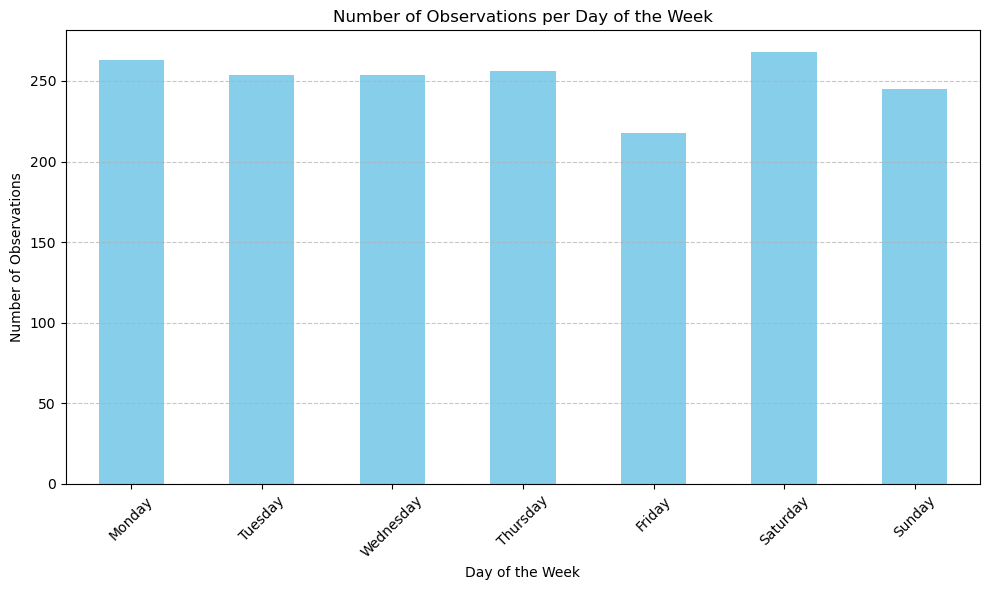

In [19]:
# Q19: calculate and plot the number of observations each day of the week has
dt4 = dt3.groupby('weekday').size()
plt.figure(figsize=(10, 6))
dt4.plot(kind='bar', color='skyblue')
plt.title('Number of Observations per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Observations')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()